##**Stock market prediction using Linear Regression algorithim**

In [195]:
# installing required library for fetching data
try:
  import yfinance as yf
except:  
  %pip install yfinance
  import yfinance as yf

In [196]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Collecting data using Yfinance 

In [198]:
# downloading the stock-market data of TCS, the tiker symbol in yahoofinance
# for tcs is "TCS.NS".
# in yahoo finance all the stocks listed in nifty have a ".NS" and
# the stocks listed in sensex has ".BS"
start = datetime.datetime(2012,4,1)
end = datetime.datetime(2022,3,31)
tcs = yf.download("TCS.NS",start,end)

[*********************100%***********************]  1 of 1 completed


In [199]:
# creating a csv file for the data fetched
tcs.to_csv('TCS')

# EDA

In [200]:
tcs.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-04-02,585.000000,599.500000,585.000000,597.125000,477.532715,2326988
2012-04-03,600.099976,603.674988,587.650024,589.000000,471.035004,2269154
2012-04-04,584.500000,594.900024,583.500000,589.224976,471.214783,2165054
2012-04-09,585.000000,594.000000,579.125000,582.049988,465.476746,1576628
2012-04-10,583.150024,587.825012,576.125000,578.099976,462.317932,1532992


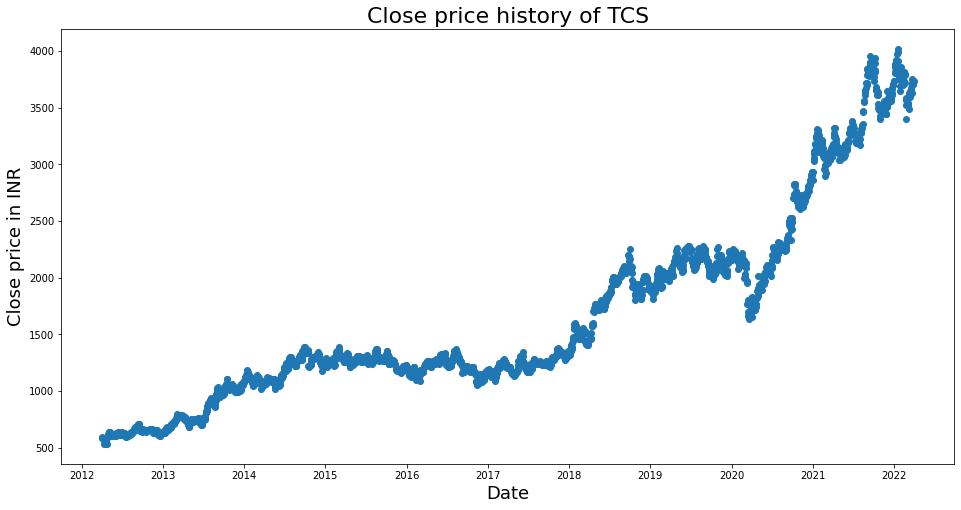

In [201]:
# plotting the "Close" price of TCS to analyse the trend
plt.figure(figsize=(16,8))
plt.scatter(tcs.index,tcs['Close'])
# plt.scatter(tcs['Close'],tcs.index)
plt.title('Close price history of TCS',fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in INR',fontsize=18)
plt.show()

Here we can see that the stock has a upward trend and had a huge boom in 2020 during the covid period.Lets take a close look at data between 2020 and 2022

In [202]:
# filtering the data to get data during the covid period 
after_covid = tcs.loc[tcs.index > datetime.datetime(2020,3,31)]

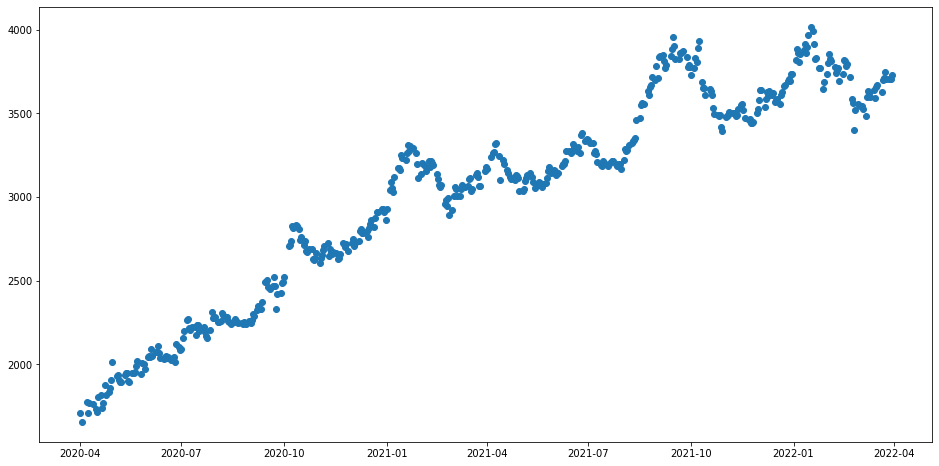

In [203]:
plt.figure(figsize=(16,8))
plt.scatter(after_covid.index,after_covid['Close'])
plt.show()

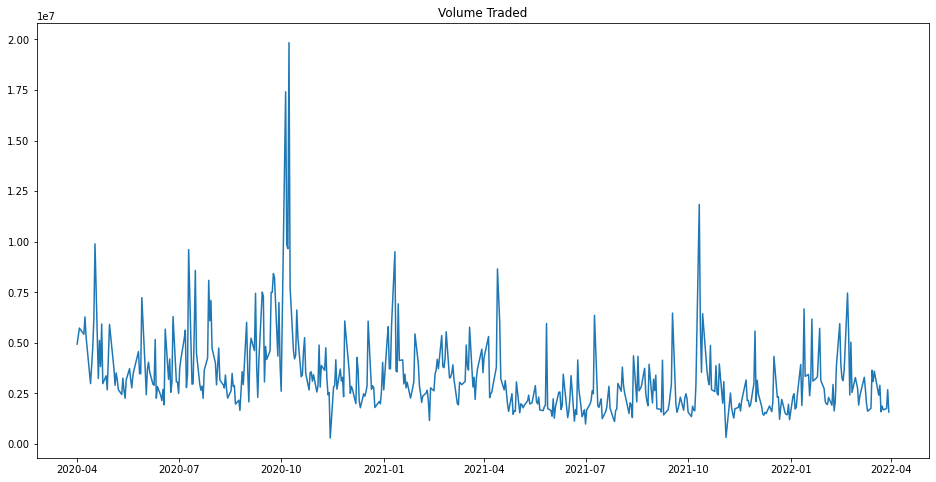

In [204]:
plt.figure(figsize=(16,8))
plt.title('Volume Traded')
plt.plot(after_covid.index,after_covid['Volume'])
plt.show()

Here we can see that the price of the stock almost doubled during covid.

In [208]:
tcs.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999765,0.999766,0.999529,0.998973,0.086523
High,0.999765,1.000000,0.999728,0.999814,0.999302,0.091618
Low,0.999766,0.999728,1.000000,0.999791,0.999211,0.082977
Close,0.999529,0.999814,0.999791,1.000000,0.999430,0.087267
Adj Close,0.998973,0.999302,0.999211,0.999430,1.000000,0.089805
Volume,0.086523,0.091618,0.082977,0.087267,0.089805,1.000000


Here we can see that "Open price", "High", "Low" is more corelatred to "Closing price", so will only use these to train the model. 

In [209]:
# now lets move on to create a model to predict the price

# Preprocessing the data.

In [210]:
tcs.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [211]:
X = tcs.iloc[:,0:3]
y = tcs.iloc[:,3]

* performs better when not scaled

In [213]:
# mm = MinMaxScaler()
# ss = StandardScaler()
# X_scaled = ss.fit_transform(X)

In [214]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)


Model Building

In [215]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


In [216]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9998534742708257
6.8939330026649746
109.98499630389621


# Testing

we will collect stock data from 31/3/2022 to 31/1/2023

---



In [217]:
new_start_date = end
new_end_date = datetime.datetime(2023,1,31)

In [218]:
tcs_new = yf.download("TCS.NS",new_start_date,new_end_date)
tcs_new.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-31,3740.000000,3754.649902,3720.199951,3739.949951,3622.207520,2168110
2022-04-01,3748.000000,3763.000000,3728.050049,3758.750000,3640.416016,1387014
2022-04-04,3762.000000,3780.000000,3737.100098,3770.350098,3651.650879,1472994
2022-04-05,3772.000000,3835.600098,3772.000000,3814.800049,3694.701416,2314947
2022-04-06,3809.300049,3809.300049,3731.149902,3755.350098,3637.123047,2051729


In [219]:
# splitting the data set
X_new = tcs_new.iloc[:,0:3]
y_new = tcs_new.iloc[:,3]

In [220]:
# NOW TO TEST THE MODEL
y_pred_new = lr.predict(X_new)

In [221]:
results = pd.DataFrame({'Actual':y_new,'Predicted':y_pred_new})

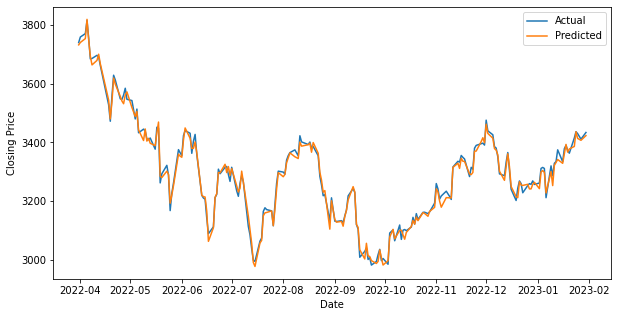

In [222]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

From this we can see that the model preforms well as the lines overlap each other most of the time thus the error margin really low!

In [223]:
print(r2_score(y_new,y_pred_new))
print(mean_absolute_error(y_new,y_pred_new))
print(mean_squared_error(y_new,y_pred_new))

0.9921890142775279
12.37481224281096
222.89566759003404
